### 尝试将单个h5文件转换为png格式

In [1]:
import h5py
import numpy as np
from PIL import Image
import os

def h5_to_png(h5_file, output_dir):
    """
    将 .h5 文件中的CT图像数据转换为 .png 格式。
    
    参数：
    - h5_file: 输入的 .h5 文件路径
    - output_dir: 输出的保存目录
    """
    # 打开HDF5文件
    with h5py.File(h5_file, 'r') as f:
        # 查看文件中有哪些数据集
        print("文件包含的键:", list(f.keys()))
        
        # 假设CT图像数据存储在 'ct_scan' 数据集中，具体名称需要根据你的数据调整
        # 你可以打印文件结构查看具体的结构
        ct_data = f['ct_scan'][:]
        
        # 检查数据形状
        print(f"CT数据的形状: {ct_data.shape}")
        
        # 假设数据是3D的，遍历每一层（Z轴切片）
        for slice_idx in range(ct_data.shape[0]):  # ct_data.shape[0] 是Z轴的切片数
            slice_data = ct_data[slice_idx, :, :]  # 选择第 slice_idx 个切片
            
            # 将切片数据归一化到 [0, 255] 范围
            slice_data = np.uint8(np.interp(slice_data, (slice_data.min(), slice_data.max()), (0, 255)))
            
            # 使用 Pillow 将切片保存为 .png 格式
            img_pil = Image.fromarray(slice_data)
            
            # 构建输出文件路径，使用原文件名作为基准
            output_file = os.path.join(output_dir, f"slice_{slice_idx}.png")
            
            # 保存为 PNG 文件
            img_pil.save(output_file)
            print(f"切片 {slice_idx} 图像已保存为 {output_file}")

# 示例使用
h5_file = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices/subject2_DE_slice_0.h5'  # 输入的 .h5 文件路径
output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output'  # 输出目录，确保该目录已存在

# 创建输出目录（如果不存在）
os.makedirs(output_dir, exist_ok=True)

# 将 .h5 文件中的 CT 图像数据转换为 .png 格式
h5_to_png(h5_file, output_dir)

# h5文件中有多个键，也就是多个图像，需要进行特殊的转换。

文件包含的键: ['image', 'label', 'scribble']


KeyError: "Unable to open object (object 'ct_scan' doesn't exist)"

### 查看h5文件中的键信息

In [2]:
import h5py

def explore_h5_structure(h5_file):
    with h5py.File(h5_file, 'r') as f:
        # 打印文件结构
        def print_structure(name, obj):
            print(f"Name: {name}, Type: {type(obj)}")
            
        # 打印每个对象的信息
        f.visititems(print_structure)

# 示例使用
h5_file = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices/subject2_DE_slice_0.h5'  # 输入的 .h5 文件路径
explore_h5_structure(h5_file)


Name: image, Type: <class 'h5py._hl.dataset.Dataset'>
Name: label, Type: <class 'h5py._hl.dataset.Dataset'>
Name: scribble, Type: <class 'h5py._hl.dataset.Dataset'>


### 查看h5文件中每个键的详细信息，每个都是一个图片
### image: 原图，label: 掩码，scribble: 将掩码用线条描出来（语义分割用不到）

In [12]:
import h5py

def print_h5_info(h5_file):
    """
    打印 HDF5 文件中每个数据集的具体信息（如键名、数据形状和数据类型）。
    
    参数：
    - h5_file: 输入的 .h5 文件路径
    """
    # 打开 HDF5 文件
    with h5py.File(h5_file, 'r') as f:
        # 遍历文件中的所有键
        for key in f.keys():
            # 获取数据集
            dataset = f[key]
            # 输出键名、形状和数据类型
            print(f"Key: {key}")
            print(f"Shape: {dataset.shape}")
            print(f"Data type: {dataset.dtype}")
            print("-" * 40)

# 示例使用
h5_file = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_testing_volumes/subject3_DE.h5'  # 输入的 .h5 文件路径
print_h5_info(h5_file)


Key: image
Shape: (15, 480, 480)
Data type: float32
----------------------------------------
Key: label
Shape: (15, 480, 480)
Data type: int16
----------------------------------------


In [13]:
import h5py
import numpy as np
from PIL import Image
import os

def h5_to_png(h5_file, output_dir):
    """
    将 .h5 文件中的每个数据集（image, label, scribble）转换为 PNG 格式。
    
    参数：
    - h5_file: 输入的 .h5 文件路径
    - output_dir: 输出的保存目录
    """
    # 打开 HDF5 文件
    with h5py.File(h5_file, 'r') as f:
        # 获取 'image', 'label' 和 'scribble' 数据集
        datasets = ['image', 'label', 'scribble']
        
        for dataset_name in datasets:
            # 获取数据集
            dataset = f[dataset_name]
            data = dataset[:]
            
            # 检查数据形状
            print(f"Key: {dataset_name}")
            print(f"Shape: {data.shape}")
            print(f"Data type: {dataset.dtype}")
            print("-" * 40)
            
            # 将数据归一化到 [0, 255] 范围（如果需要）
            if dataset_name == 'image':  # 对于 'image' 键，通常需要归一化
                data = np.uint8(np.interp(data, (data.min(), data.max()), (0, 255)))
            else:  # 对于 'label' 和 'scribble'，可以选择直接保存
                data = np.uint8(data)
            
            # 使用 Pillow 将图像保存为 .png 格式
            img_pil = Image.fromarray(data)
            
            # 构建输出文件路径，使用原文件名并添加键名
            base_filename = os.path.basename(h5_file).split('.')[0]  # 获取文件名，不包含后缀
            output_file = os.path.join(output_dir, f"{base_filename}_{dataset_name}.png")
            
            # 保存为 PNG 文件
            img_pil.save(output_file)
            print(f"图像已保存为 {output_file}")

# 示例使用
h5_file = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices/subject2_DE_slice_4.h5'  # 输入的 .h5 文件路径
output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output'  # 输出目录，确保该目录已存在

# 将 .h5 文件中的数据转换为 .png 格式
h5_to_png(h5_file, output_dir)


Key: image
Shape: (512, 512)
Data type: float32
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output\subject2_DE_slice_4_image.png
Key: label
Shape: (512, 512)
Data type: int16
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output\subject2_DE_slice_4_label.png
Key: scribble
Shape: (512, 512)
Data type: uint16
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output\subject2_DE_slice_4_scribble.png


In [14]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
label_path = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output/subject2_DE_slice_4_label.png'
label = cv2.imread(label_path)
label.shape

(512, 512, 3)

In [18]:
np.unique(label)

array([0, 1, 2, 3], dtype=uint8)

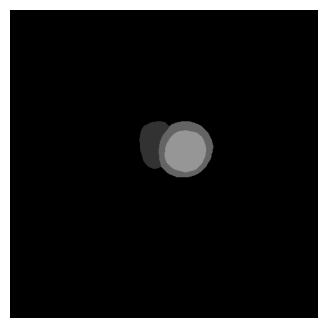

In [19]:
plt.figure(figsize=(6, 4))
plt.imshow(label*50)
plt.axis('off')
plt.show()

### 查看scribble掩码图

In [6]:
label_path = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output/subject2_DE_slice_4_scribble.png'
label = cv2.imread(label_path)

In [8]:
np.unique(label)

array([0, 1, 2, 3, 4], dtype=uint8)

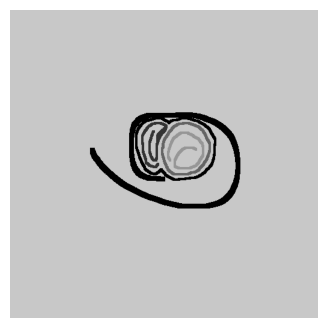

In [7]:
plt.figure(figsize=(6, 4))
plt.imshow(label*50)
plt.axis('off')
plt.show()

### 按文件夹将h5文件转换为png格式,此部分不是最终版本，不要运行

In [24]:
# import h5py
# import numpy as np
# from PIL import Image
# import os

# def h5_to_png(h5_file, image_output_dir, label_output_dir):
#     """
#     将 .h5 文件中的 'image' 和 'label' 数据集转换为 PNG 格式，分别保存到不同的文件夹。
    
#     参数：
#     - h5_file: 输入的 .h5 文件路径
#     - image_output_dir: 保存 'image' 转换结果的文件夹
#     - label_output_dir: 保存 'label' 转换结果的文件夹
#     """
#     # 打开 HDF5 文件
#     with h5py.File(h5_file, 'r') as f:
#         # 获取数据集名称
#         datasets = ['image', 'label']
        
#         # 获取文件的基本文件名，不带后缀
#         base_filename = os.path.basename(h5_file).split('.')[0]
        
#         # 遍历处理 'image' 和 'label' 键
#         for dataset_name in datasets:
#             if dataset_name not in f:
#                 continue  # 如果该数据集不存在，则跳过

#             # 获取数据集
#             dataset = f[dataset_name]
#             data = dataset[:]

#             # 检查数据形状
#             print(f"Processing {dataset_name} from {base_filename}")
#             print(f"Shape: {data.shape}")
#             print(f"Data type: {dataset.dtype}")
#             print("-" * 40)
            
#             # 对 'image' 进行归一化
#             if dataset_name == 'image':
#                 # 如果是3D数据，可能是图像序列，选择某个切片
#                 if len(data.shape) == 3:
#                     data = data[0, :, :]  # 选择第一个切片，或者可以选择其他切片
#                 data = np.uint8(np.interp(data, (data.min(), data.max()), (0, 255)))
#             else:  # 对于 'label' 数据集，不需要归一化
#                 if len(data.shape) == 3:
#                     data = data[0, :, :]  # 同样选择第一个切片，或者根据需要调整
#                 data = np.uint8(data)
            
#             # 使用 Pillow 将图像保存为 .png 格式
#             img_pil = Image.fromarray(data)
            
#             # 根据数据集名称选择保存目录
#             if dataset_name == 'image':
#                 output_dir = image_output_dir
#             else:
#                 output_dir = label_output_dir
            
#             # 构建输出文件路径，使用原文件名作为输出文件名
#             output_file = os.path.join(output_dir, f"{base_filename}.png")
            
#             # 保存为 PNG 文件
#             img_pil.save(output_file)
#             print(f"图像已保存为 {output_file}")

# def process_folder(input_folder, image_output_dir, label_output_dir):
#     """
#     处理指定文件夹内的所有 .h5 文件，将其转换为 PNG 格式。
    
#     参数：
#     - input_folder: 包含 .h5 文件的文件夹路径
#     - image_output_dir: 保存 'image' 数据集转换结果的文件夹
#     - label_output_dir: 保存 'label' 数据集转换结果的文件夹
#     """
#     # 遍历文件夹内的所有 .h5 文件
#     for filename in os.listdir(input_folder):
#         if filename.endswith('.h5'):
#             h5_file = os.path.join(input_folder, filename)
#             print(f"正在处理 {h5_file}")
#             # 将每个 h5 文件中的 'image' 和 'label' 键转换为 PNG 格式
#             h5_to_png(h5_file, image_output_dir, label_output_dir)

# # 示例使用
# input_folder = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_volumes'  # 输入文件夹路径
# image_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/train_val'  # 保存 'image' 数据集转换结果的文件夹
# label_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/ann_dir/train_val'  # 保存 'label' 数据集转换结果的文件夹

# # image_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output'  # 保存 'image' 数据集转换结果的文件夹
# # label_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output_1'  # 保存 'label' 数据集转换结果的文件夹

# # 处理文件夹内的所有 .h5 文件
# process_folder(input_folder, image_output_dir, label_output_dir)

正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_volumes\subject1_DE.h5
Processing image from subject1_DE
Shape: (15, 512, 512)
Data type: float32
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/train_val\subject1_DE.png
Processing label from subject1_DE
Shape: (15, 512, 512)
Data type: int16
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/ann_dir/train_val\subject1_DE.png
正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_volumes\subject29_DE.h5
Processing image from subject29_DE
Shape: (14, 480, 480)
Data type: float32
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/train_val\subject29_DE.png
Processing label from subject29_DE
Shape: (14, 480, 480)
Data type: uint16
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg

### 加入对MSCMRSeg的切片进行转换，不是最终版本，不要运行。

In [ ]:
# import h5py
# import numpy as np
# from PIL import Image
# import os

# def h5_to_png(h5_file, image_output_dir, label_output_dir):
#     """
#     将 .h5 文件中的 'image' 和 'label' 数据集转换为 PNG 格式，分别保存到不同的文件夹。
#     根据每个数据集的切片数动态命名每个切片的 PNG 图像。
    
#     参数：
#     - h5_file: 输入的 .h5 文件路径
#     - image_output_dir: 保存 'image' 转换结果的文件夹
#     - label_output_dir: 保存 'label' 转换结果的文件夹
#     """
#     # 打开 HDF5 文件
#     with h5py.File(h5_file, 'r') as f:
#         # 获取数据集名称
#         datasets = ['image', 'label']
        
#         # 获取文件的基本文件名，不带后缀
#         base_filename = os.path.basename(h5_file).split('.')[0]
        
#         # 遍历处理 'image' 和 'label' 键
#         for dataset_name in datasets:
#             if dataset_name not in f:
#                 continue  # 如果该数据集不存在，则跳过

#             # 获取数据集
#             dataset = f[dataset_name]
#             data = dataset[:]

#             # 检查数据形状
#             print(f"Processing {dataset_name} from {base_filename}")
#             print(f"Shape: {data.shape}")
#             print(f"Data type: {dataset.dtype}")
#             print("-" * 40)
            
#             # 对 'image' 进行归一化
#             if dataset_name == 'image':
#                 # 处理每个切片，检查切片数量
#                 if len(data.shape) == 3:
#                     for i in range(data.shape[0]):  # 迭代每个切片
#                         slice_data = data[i, :, :]  # 选择第i个切片
#                         # 归一化到 [0, 255]
#                         slice_data = np.uint8(np.interp(slice_data, (slice_data.min(), slice_data.max()), (0, 255)))
#                         # 使用 Pillow 将图像保存为 .png 格式
#                         img_pil = Image.fromarray(slice_data)
#                         output_file = os.path.join(image_output_dir, f"{base_filename}_image_slice{i+1}.png")
#                         img_pil.save(output_file)
#                         print(f"图像已保存为 {output_file}")
#             else:  # 对于 'label' 数据集
#                 if len(data.shape) == 3:
#                     for i in range(data.shape[0]):  # 迭代每个切片
#                         slice_data = data[i, :, :]  # 选择第i个切片
#                         slice_data = np.uint8(slice_data)
#                         # 使用 Pillow 将图像保存为 .png 格式
#                         img_pil = Image.fromarray(slice_data)
#                         output_file = os.path.join(label_output_dir, f"{base_filename}_label_slice{i+1}.png")
#                         img_pil.save(output_file)
#                         print(f"图像已保存为 {output_file}")
#                 else:
#                     # 如果 'label' 数据集不是3D数据，则直接跳过
#                     print(f"{dataset_name} 数据集不包含切片维度，跳过保存")
                    

# def process_folder(input_folder, image_output_dir, label_output_dir):
#     """
#     遍历文件夹中的所有 .h5 文件，并将其中的 'image' 和 'label' 键转换为 PNG 图像。
    
#     参数：
#     - input_folder: 包含 .h5 文件的文件夹路径
#     - image_output_dir: 保存 'image' 转换结果的文件夹
#     - label_output_dir: 保存 'label' 转换结果的文件夹
#     """
#     # 获取所有的 h5 文件
#     h5_files = [f for f in os.listdir(input_folder) if f.endswith('.h5')]
    
#     for h5_file in h5_files:
#         h5_file_path = os.path.join(input_folder, h5_file)
#         print(f"正在处理 {h5_file_path}")
#         # 将每个 h5 文件中的 'image' 和 'label' 键转换为 PNG 格式
#         h5_to_png(h5_file_path, image_output_dir, label_output_dir)


# # 示例使用
# input_folder = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices'  # 输入的 .h5 文件所在文件夹路径
# image_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/train'  # 输出目录，保存 'image' 转换结果
# label_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/ann_dir/train'  # 输出目录，保存 'label' 转换结果

# # 处理文件夹内的所有 .h5 文件
# process_folder(input_folder, image_output_dir, label_output_dir)


正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices\subject13_DE_slice_0.h5
Processing image from subject13_DE_slice_0
Shape: (480, 480)
Data type: float32
----------------------------------------
Processing label from subject13_DE_slice_0
Shape: (480, 480)
Data type: int16
----------------------------------------
label 数据集不包含切片维度，跳过保存
正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices\subject13_DE_slice_1.h5
Processing image from subject13_DE_slice_1
Shape: (480, 480)
Data type: float32
----------------------------------------
Processing label from subject13_DE_slice_1
Shape: (480, 480)
Data type: int16
----------------------------------------
label 数据集不包含切片维度，跳过保存
正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_training_slices\subject13_DE_slice_10.h5
Processing image from subject13_DE_slice_10
Shape: (480, 480)
Data type: float32
----------------------------------------
Processing label from subject13_DE_slice_10


In [37]:
label_path = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/test_output_1/subject8_DE_label_slice8.png'
label = cv2.imread(label_path)
label.shape

(480, 480, 3)

In [38]:
np.unique(label)

array([0, 1, 2, 3], dtype=uint8)

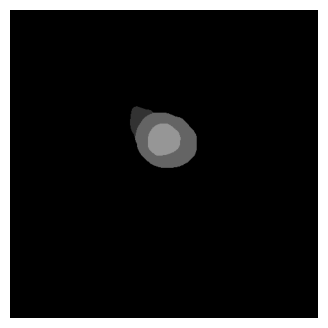

In [39]:
plt.figure(figsize=(6, 4))
plt.imshow(label*50)
plt.axis('off')
plt.show()

### 加入判断如果h5文件没有切片直接将其保存为png图片
### 如果h5文件有切片则进行切片处理，如果没有则直接转换成png图片
### training_slices（训练集）没有切片，training_volumes（验证集）有切片，testing_volumes（测试集）有切片

In [43]:
import h5py
import numpy as np
from PIL import Image
import os

def h5_to_png(h5_file, image_output_dir, label_output_dir):
    """
    将 .h5 文件中的 'image' 和 'label' 数据集转换为 PNG 格式，分别保存到不同的文件夹。
    根据每个数据集的切片数动态命名每个切片的 PNG 图像。
    
    参数：
    - h5_file: 输入的 .h5 文件路径
    - image_output_dir: 保存 'image' 转换结果的文件夹
    - label_output_dir: 保存 'label' 转换结果的文件夹
    """
    # 打开 HDF5 文件
    with h5py.File(h5_file, 'r') as f:
        # 获取数据集名称
        datasets = ['image', 'label']
        
        # 获取文件的基本文件名，不带后缀
        base_filename = os.path.basename(h5_file).split('.')[0]
        
        # 遍历处理 'image' 和 'label' 键
        for dataset_name in datasets:
            if dataset_name not in f:
                continue  # 如果该数据集不存在，则跳过

            # 获取数据集
            dataset = f[dataset_name]
            data = dataset[:]

            # 检查数据形状
            print(f"Processing {dataset_name} from {base_filename}")
            print(f"Shape: {data.shape}")
            print(f"Data type: {dataset.dtype}")
            print("-" * 40)
            
            # 对 'image' 进行归一化
            if dataset_name == 'image':
                # 如果数据是 3D 数据（有切片），则处理每个切片
                if len(data.shape) == 3:
                    for i in range(data.shape[0]):  # 迭代每个切片
                        slice_data = data[i, :, :]  # 选择第i个切片
                        # 归一化到 [0, 255]
                        slice_data = np.uint8(np.interp(slice_data, (slice_data.min(), slice_data.max()), (0, 255)))
                        # 使用 Pillow 将图像保存为 .png 格式
                        img_pil = Image.fromarray(slice_data)
                        output_file = os.path.join(image_output_dir, f"{base_filename}_image_slice{i+1}.png")
                        # 确保保存目录存在
                        os.makedirs(os.path.dirname(output_file), exist_ok=True)
                        img_pil.save(output_file)
                        print(f"图像已保存为 {output_file}")
                else:  # 如果是 2D 数据（没有切片）
                    # 直接保存为 PNG 文件
                    img_pil = Image.fromarray(np.uint8(np.interp(data, (data.min(), data.max()), (0, 255))))
                    output_file = os.path.join(image_output_dir, f"{base_filename}_image.png")
                    # 确保保存目录存在
                    os.makedirs(os.path.dirname(output_file), exist_ok=True)
                    img_pil.save(output_file)
                    print(f"图像已保存为 {output_file}")
            else:  # 对于 'label' 数据集
                # 如果数据是 3D 数据（有切片），则处理每个切片
                if len(data.shape) == 3:
                    for i in range(data.shape[0]):  # 迭代每个切片
                        slice_data = data[i, :, :]  # 选择第i个切片
                        slice_data = np.uint8(slice_data)
                        # 使用 Pillow 将图像保存为 .png 格式
                        img_pil = Image.fromarray(slice_data)
                        output_file = os.path.join(label_output_dir, f"{base_filename}_label_slice{i+1}.png")
                        # 确保保存目录存在
                        os.makedirs(os.path.dirname(output_file), exist_ok=True)
                        img_pil.save(output_file)
                        print(f"图像已保存为 {output_file}")
                else:  # 如果是 2D 数据（没有切片）
                    # 直接保存为 PNG 文件
                    img_pil = Image.fromarray(np.uint8(data))
                    output_file = os.path.join(label_output_dir, f"{base_filename}_label.png")
                    # 确保保存目录存在
                    os.makedirs(os.path.dirname(output_file), exist_ok=True)
                    img_pil.save(output_file)
                    print(f"图像已保存为 {output_file}")


def process_folder(input_folder, image_output_dir, label_output_dir):
    """
    遍历文件夹中的所有 .h5 文件，并将其中的 'image' 和 'label' 键转换为 PNG 图像。
    
    参数：
    - input_folder: 包含 .h5 文件的文件夹路径
    - image_output_dir: 保存 'image' 转换结果的文件夹
    - label_output_dir: 保存 'label' 转换结果的文件夹
    """
    # 获取所有的 h5 文件
    h5_files = [f for f in os.listdir(input_folder) if f.endswith('.h5')]
    
    for h5_file in h5_files:
        h5_file_path = os.path.join(input_folder, h5_file)
        print(f"正在处理 {h5_file_path}")
        # 将每个 h5 文件中的 'image' 和 'label' 键转换为 PNG 格式
        h5_to_png(h5_file_path, image_output_dir, label_output_dir)


# 示例使用
input_folder = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_testing_volumes'  # 输入的 .h5 文件所在文件夹路径
image_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val'  # 输出目录，保存 'image' 转换结果
label_output_dir = 'E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/ann_dir/val'  # 输出目录，保存 'label' 转换结果

# 处理文件夹内的所有 .h5 文件
process_folder(input_folder, image_output_dir, label_output_dir)


正在处理 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMR_testing_volumes\subject10_DE.h5
Processing image from subject10_DE
Shape: (15, 512, 512)
Data type: float32
----------------------------------------
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice1.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice2.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice3.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice4.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice5.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice6.png
图像已保存为 E:/paperwork/trans_data/MSCMRSeg/MSCMR_preprocessed/MSCMRSeg/img_dir/val\subject10_DE_image_slice7.png
图像已保存为 E:/paperwor